Problem statement:

-to build a predictive model and find out the sales of each product at a particular store by using the given data.

In [30]:
#loading the dataset

import pandas as pd
import numpy as np

df=pd.read_csv("bigdatamart_train.csv")

In [2]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [5]:
df.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4271,FDJ45,17.750,Low Fat,0.073350,Seafood,34.2216,OUT013,1987,High,Tier 3,Supermarket Type1,934.7832
6350,NCL55,12.150,Low Fat,0.064792,Others,254.0040,OUT045,2002,NaN,Tier 2,Supermarket Type1,2277.0360
3189,FDD48,10.395,Low Fat,0.030220,Baking Goods,114.7176,OUT045,2002,NaN,Tier 2,Supermarket Type1,2748.4224
4192,FDC60,NaN,Regular,0.200426,Baking Goods,88.8514,OUT019,1985,Small,Tier 1,Grocery Store,265.6542
6319,FDP58,11.100,Low Fat,0.135693,Snack Foods,220.0482,OUT018,2009,Medium,Tier 3,Supermarket Type2,2628.5784


Observations:
- missing values are present
- 'Item_Visibility' column has values as 0 for some rows which is technically incorrect, since nothing in a store has a visibility of 0
- 'Itam_Identifier' and 'Item_Type' are realted to each other, as 'FD' is for food category, 'DR' is for drinks and 'NC' is for Non consumables
- 'Outlet_Establishment_Year' has values as year, this might become complex for our model to predict sales, in simple means it might end up decreasing the accuracy, we will deal with it later

In [6]:
#checking for null values

df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:>

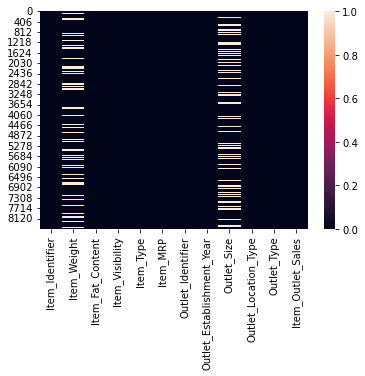

In [8]:
sns.heatmap(df.isnull())

-only two columns have null values, so we will deal with it by using SimpleImputer.

In [9]:
#imputation:

from sklearn.impute import SimpleImputer

In [10]:
#checking datatype

df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Imputation technique:
    
- so, as the 'Item_weight' feature has float datatype we will use simple imputer with strtegy as mean.
- while, 'Outlet_size' has object or categorical datatype so we will use most_frquent or mode strategy 

In [31]:
imp=SimpleImputer()
df['Item_Weight']=imp.fit_transform(df['Item_Weight'].values.reshape(-1,1))

In [32]:
imp=SimpleImputer(strategy='most_frequent')
df['Outlet_Size']=imp.fit_transform(df['Outlet_Size'].values.reshape(-1,1))

<AxesSubplot:>

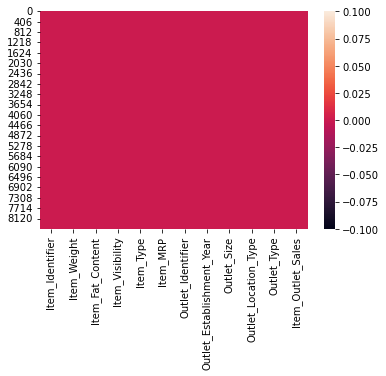

In [13]:
#now checking for null values

sns.heatmap(df.isnull())

-so the null values have been replaced

In [14]:
#checking datatypes

df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

-now as the dataset has so many object datatype columns, data transformation needs to be done for further processes

In [15]:
len(df['Item_Identifier'].unique())

1559

-'Item_Identifier' column has so many unique values so it will a bit tricky to transform this data, so we will combine it later on.

In [16]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

- okay since, this column has only a few unique classes, so it will be easier to transform.
- also it has some typos as Low Fat has been typed as LF or low fat for some procuts etc

In [17]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

-so the 'Item_Type' variable has 16 unique classes
-but as it would get a bit complex we are going to combine it later

In [18]:
df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

-10 uinque classes are present, so we will encode it later on

In [19]:
df['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [20]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [21]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

# Data Transformation and Creation:

-now we are going to combine 'Item_Identifier' and 'Item_Type' as transforming that would be a little tricky because of so many unique classes that are present

In [33]:
#so,

df['Item_Type_New']=df['Item_Identifier'].apply(lambda x:x[:2])
df['Item_Type_New']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: Item_Type_New, Length: 8523, dtype: object

In [34]:
#now replacing it with food,drinks and non consumables:

df['Item_Type_New']=df['Item_Type_New'].replace({'FD':'Food','DR':'Drinks','NC':'Non-Consumable'})

In [24]:
df['Item_Type_New'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_New, dtype: int64

-as observed before Item Visibility has values as zero which in incorrect, we are going to replace the zeros with the mean of the column

In [35]:
df.loc[:,'Item_Visibility'].replace([0],[df['Item_Visibility'].mean()],inplace=True)

In [36]:
(df['Item_Visibility']==0).sum()

0

In [37]:
#Now replacing the typos in 'Item_Fat_Content'

df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'},inplace=True)

In [38]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [29]:
df.tail(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_New
8513,FDH31,12.000,Regular,0.020407,Meat,99.9042,OUT035,2004,Small,Tier 2,Supermarket Type1,595.2252,Food
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,Medium,Tier 2,Supermarket Type1,468.7232,Food
8515,FDH24,20.700,Low Fat,0.021518,Baking Goods,157.5288,OUT018,2009,Medium,Tier 3,Supermarket Type2,1571.2880,Food
8516,NCJ19,18.600,Low Fat,0.118661,Others,58.7588,OUT018,2009,Medium,Tier 3,Supermarket Type2,858.8820,Non-Consumable
8517,FDF53,20.750,Regular,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360,Food
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,Food
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,Food
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,Non-Consumable
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,Food
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700,Drinks


In [39]:
#now as we can see that for Non-Consumable products Fat content is given which is absurd, so we will replace it by Non-edible 

df.loc[df['Item_Type_New']=='Non-Consumable','Item_Fat_Content']='Non-Edible'
#df.loc[True,True]

df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

Establishment Year:
- instead of Establishment year we are going to use for how long an outlet has been operating, it will give us small numbers in result unlike year as 2009,1998 etc
- since the data is from year 2013, we are going use that only

In [40]:
df['Outlet_Years']=2013-df['Outlet_Establishment_Year']

In [32]:
df['Outlet_Years']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Years, Length: 8523, dtype: int64

In [33]:
df.sample(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_New,Outlet_Years
8322,NCE42,21.100000,Non-Edible,0.010602,Household,235.3958,OUT046,1997,Small,Tier 1,Supermarket Type1,3271.7412,Non-Consumable,16
4678,FDD32,17.700000,Regular,0.041099,Fruits and Vegetables,80.9276,OUT018,2009,Medium,Tier 3,Supermarket Type2,487.3656,Food,4
7815,DRH51,12.857645,Low Fat,0.170214,Dairy,89.5856,OUT019,1985,Small,Tier 1,Grocery Store,175.7712,Drinks,28
3401,FDM03,12.650000,Low Fat,0.123008,Meat,106.0938,OUT035,2004,Small,Tier 2,Supermarket Type1,2679.8450,Food,9
5178,NCG54,12.100000,Non-Edible,0.080131,Household,170.9106,OUT018,2009,Medium,Tier 3,Supermarket Type2,1539.9954,Non-Consumable,4
8512,FDR26,20.700000,Low Fat,0.042801,Dairy,178.3028,OUT013,1987,High,Tier 3,Supermarket Type1,2479.4392,Food,26
6484,NCS06,12.857645,Non-Edible,0.031583,Household,260.9910,OUT027,1985,Medium,Tier 3,Supermarket Type3,7100.7570,Non-Consumable,28
7134,FDW25,5.175000,Low Fat,0.037399,Canned,84.2224,OUT046,1997,Small,Tier 1,Supermarket Type1,852.2240,Food,16
3611,NCF43,8.510000,Non-Edible,0.052240,Household,141.9470,OUT017,2007,Medium,Tier 2,Supermarket Type1,2004.0580,Non-Consumable,6
3946,DRD15,10.600000,Low Fat,0.056796,Dairy,232.8642,OUT046,1997,Small,Tier 1,Supermarket Type1,3485.4630,Drinks,16


In [34]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Item_Type_New                 object
Outlet_Years                   int64
dtype: object

In [35]:
#transforming the categorical data

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [41]:
df['Item_Fat']=le.fit_transform(df['Item_Fat_Content'])

In [42]:
df['Outlet']=le.fit_transform(df['Outlet_Identifier'])

In [43]:
df['Outlet_Size_Encode']=le.fit_transform(df['Outlet_Size'])

In [44]:
df['Outlet_Location']=le.fit_transform(df['Outlet_Location_Type'])

In [45]:
df['Outlet_Type_New']=le.fit_transform(df['Outlet_Type'])

In [46]:
df['Item_Type_New']=le.fit_transform(df['Item_Type_New'])

In [42]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Item_Type_New                  int32
Outlet_Years                   int64
Item_Fat                       int32
Outlet                         int32
Outlet_Size_Encode             int32
Outlet_Location                int32
Outlet_Type_New                int32
dtype: object

# EDA:

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

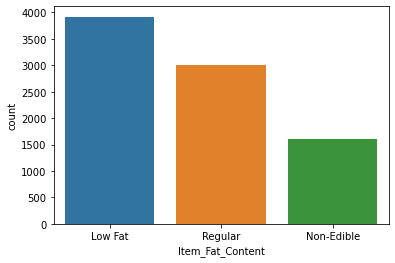

In [43]:
sns.countplot(df['Item_Fat_Content'])

Low fat has the highest count among the three

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

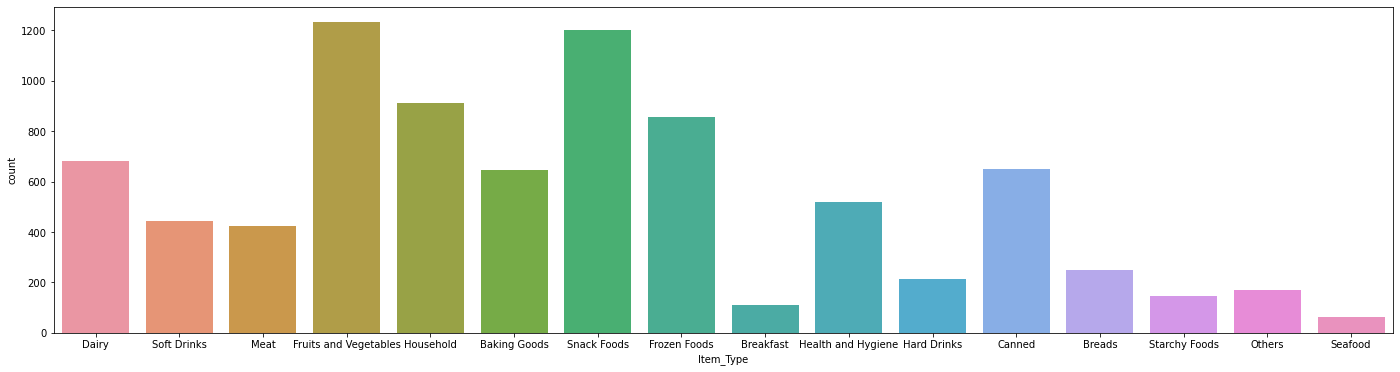

In [44]:
plt.figure(figsize=(24,6))
sns.countplot(df['Item_Type'])

-it can be seen that fruits and vegetables have the highest count while sea food has lowest

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='count'>

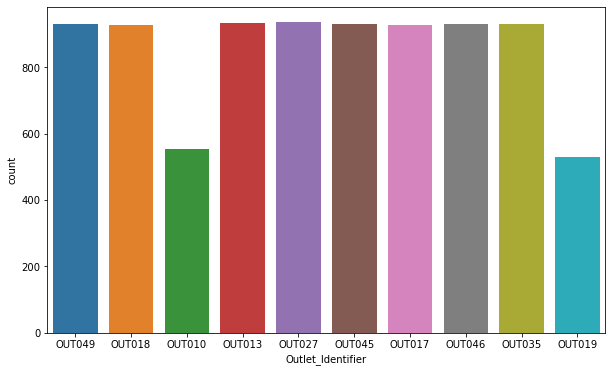

In [45]:
plt.figure(figsize=(10,6))
sns.countplot(df['Outlet_Identifier'])

-almost all outlets have similar counts

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

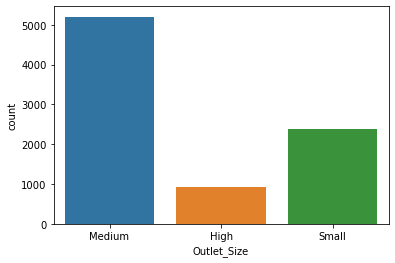

In [46]:
sns.countplot(df['Outlet_Size'])

-medium has the most count while high has least, our model might get biased

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

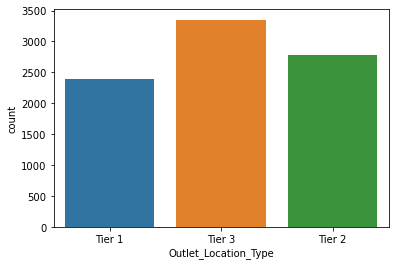

In [47]:
sns.countplot(df['Outlet_Location_Type'])

- all three categories have reasonable count

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

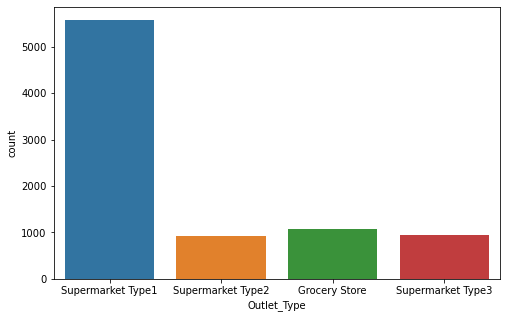

In [48]:
plt.figure(figsize=(8,5))
sns.countplot(df['Outlet_Type'])

Type 1 has most while all other three has very low counts, our data might get biased

In [49]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Item_Type_New                  int32
Outlet_Years                   int64
Item_Fat                       int32
Outlet                         int32
Outlet_Size_Encode             int32
Outlet_Location                int32
Outlet_Type_New                int32
dtype: object

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

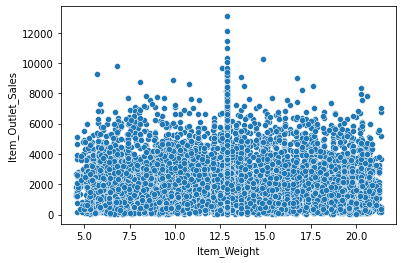

In [50]:
sns.scatterplot(x='Item_Weight',y='Item_Outlet_Sales',data=df)

-it can be seen that skewness is present, though data is distributed well for some ranges

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

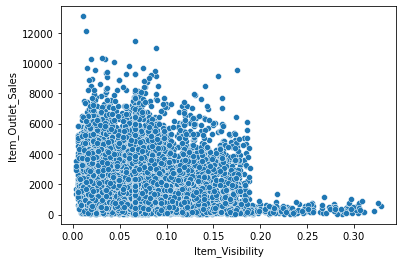

In [51]:
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',data=df)

-for visibilty>.20 sales is quite low

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

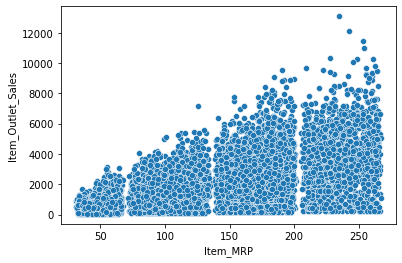

In [52]:
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',data=df)

-okay, so MRP has a linear relationship with the target variable, which means it is highly correlated 

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

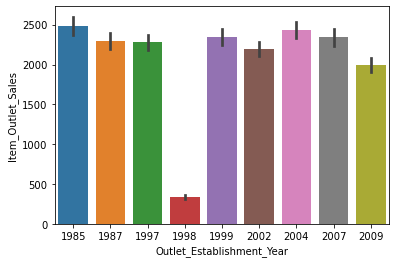

In [53]:
sns.barplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=df)

-year 1998 has least total sales,while year 1985 has the most

In [54]:
#correlation matrix

df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Type_New,Outlet_Years,Item_Fat,Outlet,Outlet_Size_Encode,Outlet_Location,Outlet_Type_New
Item_Weight,1.000000,-0.017450,0.024756,-0.008301,0.011550,0.063232,0.008301,-0.002151,-0.007975,-0.007225,0.004088,-0.000566
Item_Visibility,-0.017450,1.000000,-0.005259,-0.078355,-0.134138,-0.046290,0.078355,0.022745,-0.106377,0.072347,-0.027859,-0.179604
Item_MRP,0.024756,-0.005259,1.000000,0.005020,0.567574,0.032517,-0.005020,0.008594,0.003319,0.006059,0.000232,-0.001975
Outlet_Establishment_Year,-0.008301,-0.078355,0.005020,1.000000,-0.049135,-0.008551,-1.000000,0.001451,0.079035,0.193389,-0.089216,-0.122304
Item_Outlet_Sales,0.011550,-0.134138,0.567574,-0.049135,1.000000,0.011236,0.049135,0.015249,0.162325,-0.086182,0.089367,0.401522
Item_Type_New,0.063232,-0.046290,0.032517,-0.008551,0.011236,1.000000,0.008551,0.186485,-0.009730,-0.000624,0.007661,0.001136
Outlet_Years,0.008301,0.078355,-0.005020,-1.000000,0.049135,0.008551,1.000000,-0.001451,-0.079035,-0.193389,0.089216,0.122304
Item_Fat,-0.002151,0.022745,0.008594,0.001451,0.015249,0.186485,-0.001451,1.000000,-0.003433,-0.001791,0.000958,0.000084
Outlet,-0.007975,-0.106377,0.003319,0.079035,0.162325,-0.009730,-0.079035,-0.003433,1.000000,0.504603,-0.716176,0.099873
Outlet_Size_Encode,-0.007225,0.072347,0.006059,0.193389,-0.086182,-0.000624,-0.193389,-0.001791,0.504603,1.000000,-0.614311,-0.201483


<AxesSubplot:>

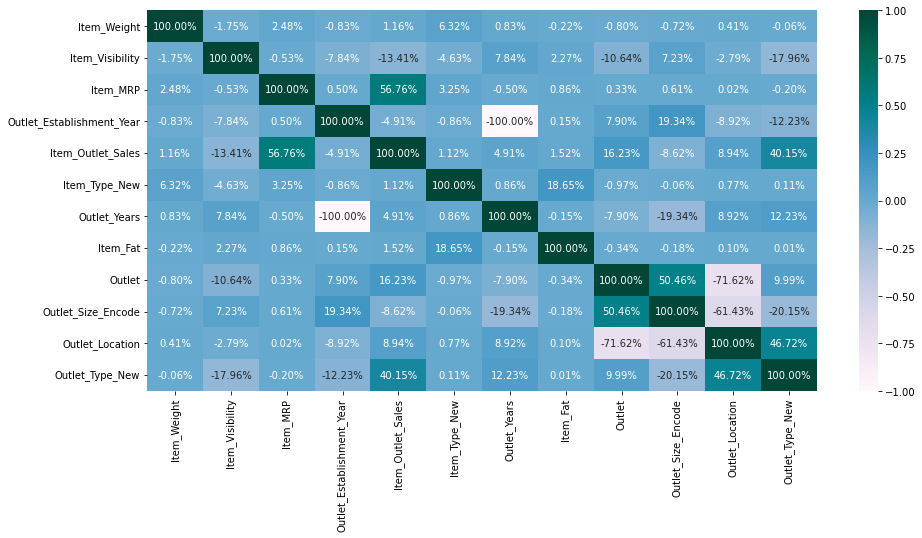

In [55]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,cmap='PuBuGn',fmt='.2%')

In [56]:
df.corr()['Item_Outlet_Sales'].sort_values()

Item_Visibility             -0.134138
Outlet_Size_Encode          -0.086182
Outlet_Establishment_Year   -0.049135
Item_Type_New                0.011236
Item_Weight                  0.011550
Item_Fat                     0.015249
Outlet_Years                 0.049135
Outlet_Location              0.089367
Outlet                       0.162325
Outlet_Type_New              0.401522
Item_MRP                     0.567574
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

so, it can be seen that:
- Item_Visibility,Outlet_Size_Encode have negatively correlated bond
- Outlet_Establishment_Year have a negative correlation bond but as we reduced the number we are getting a positive correlation bond
- Item_Type_New has the weakest correlation bond while Item_MRP has the strongest correlation bond
- Outlet_Identifier encoded as Outlet has a good correlation bond same goes with Outlet_Type_New

In [57]:
# now let's, describe our dataset:

df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Type_New,Outlet_Years,Item_Fat,Outlet,Outlet_Size_Encode,Outlet_Location,Outlet_Type_New
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.070213,140.992782,1997.831867,2181.288914,1.093864,15.168133,0.892995,4.722281,1.170832,1.112871,1.201220
std,4.226124,0.048742,62.275067,8.371760,1706.499616,0.522090,8.371760,0.895005,2.837201,0.600327,0.812757,0.796459
min,4.555000,0.003575,31.290000,1985.000000,33.290000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.310000,0.033085,93.826500,1987.000000,834.247400,1.000000,9.000000,0.000000,2.000000,1.000000,0.000000,1.000000
50%,12.857645,0.062517,143.012800,1999.000000,1794.331000,1.000000,14.000000,1.000000,5.000000,1.000000,1.000000,1.000000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400,1.000000,26.000000,2.000000,7.000000,2.000000,2.000000,1.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,2.000000,28.000000,2.000000,9.000000,2.000000,2.000000,3.000000


observations:
- only a few outliers might be present 
- only a little skewness is present
- outlet years are in arange of 4-28 years
- minimum MRP is 31.29 while maximum MRP is 266.88

<AxesSubplot:xlabel='Item_Weight'>

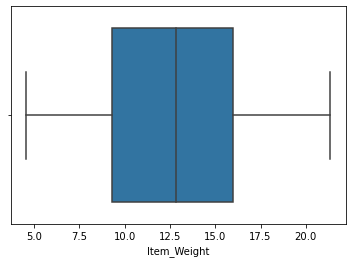

In [58]:
#let's check for outliers

sns.boxplot(df['Item_Weight'],orient="h")

<AxesSubplot:xlabel='Item_MRP'>

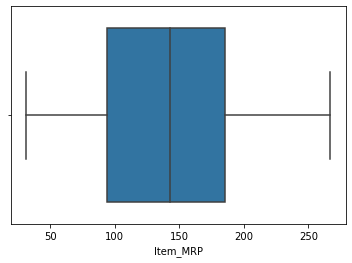

In [59]:
sns.boxplot(df['Item_MRP'],orient="h")

<AxesSubplot:xlabel='Item_Outlet_Sales'>

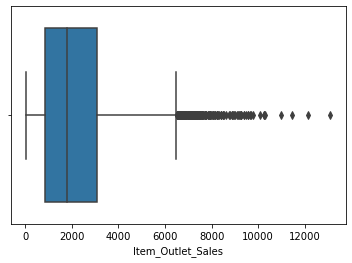

In [60]:
sns.boxplot(df['Item_Outlet_Sales'],orient="h")

- okay so our target variable has some outliers

# Data cleaning:
- we will deal with outliers, skewness and other factors in this part.

In [61]:
df.corr()['Item_Outlet_Sales'].sort_values()

Item_Visibility             -0.134138
Outlet_Size_Encode          -0.086182
Outlet_Establishment_Year   -0.049135
Item_Type_New                0.011236
Item_Weight                  0.011550
Item_Fat                     0.015249
Outlet_Years                 0.049135
Outlet_Location              0.089367
Outlet                       0.162325
Outlet_Type_New              0.401522
Item_MRP                     0.567574
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

In [62]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Item_Type_New                  int32
Outlet_Years                   int64
Item_Fat                       int32
Outlet                         int32
Outlet_Size_Encode             int32
Outlet_Location                int32
Outlet_Type_New                int32
dtype: object

In [47]:
#let's try zscore method for outliers removal

from scipy.stats import zscore

#dropping categorical datatype columns as they have been encoded and negatively correlated columns too
df_numerical=df.drop(['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Visibility','Outlet_Size_Encode'],axis=1)
z=np.abs(zscore(df_numerical))

In [44]:
np.where(z>3)

(array([ 130,  145,  276,  304,  333,  373,  456,  472,  661,  694,  753,
         809,  935,  991,  997, 1009, 1138, 1254, 1450, 1506, 1859, 1998,
        2109, 2216, 2238, 2293, 2516, 2535, 2776, 3083, 3087, 3098, 3154,
        3234, 3286, 3407, 3667, 3709, 3720, 3757, 4289, 4346, 4349, 4676,
        4681, 4772, 4888, 4961, 4991, 5065, 5177, 5185, 5223, 5315, 5500,
        5550, 5619, 5752, 5799, 5812, 5977, 6000, 6134, 6334, 6409, 6537,
        6541, 6606, 6886, 6993, 7016, 7076, 7188, 7191, 7236, 7256, 7302,
        7343, 7560, 7562, 7609, 7690, 7752, 7816, 7826, 7930, 8039, 8201,
        8245, 8447], dtype=int64),
 array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2], dtype=int64))

In [48]:
#threshold=3
df_new=df_numerical[(z<3).all(axis=1)]

In [49]:
df_numerical.shape

(8523, 9)

In [50]:
df_new.shape

(8433, 9)

In [51]:
print('Data loss is:',(8523-8433)/8523*100,'%')

Data loss is: 1.0559662090813093 %


- only 1% of data loss is occuring so we will use without outliers dataset

In [49]:
df_new.corr()['Item_Outlet_Sales'].sort_values()

Item_Weight          0.011691
Outlet_Years         0.012554
Item_Type_New        0.019030
Item_Fat             0.020284
Outlet_Location      0.069114
Outlet               0.172876
Outlet_Type_New      0.380454
Item_MRP             0.563164
Item_Outlet_Sales    1.000000
Name: Item_Outlet_Sales, dtype: float64

In [52]:
# now selecting our feature and target variable for further process

x=df_new.drop('Item_Outlet_Sales',axis=1)
y=df_new['Item_Outlet_Sales']

In [53]:
x

,Item_Weight,Item_MRP,Item_Type_New,Outlet_Years,Item_Fat,Outlet,Outlet_Location,Outlet_Type_New
0,9.300,249.8092,1,14,0,9,0,1
1,5.920,48.2692,0,4,2,3,2,2
2,17.500,141.6180,1,14,0,9,0,1
3,19.200,182.0950,1,15,2,0,2,0
4,8.930,53.8614,2,26,1,1,2,1
...,...,...,...,...,...,...,...,...
8518,6.865,214.5218,1,26,0,1,2,1
8519,8.380,108.1570,1,11,2,7,1,1
8520,10.600,85.1224,2,9,1,6,1,1
8521,7.210,103.1332,1,4,2,3,2,2


In [52]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8433, dtype: float64

In [53]:
#checking for skewness

x.skew()

Item_Weight        0.089962
Item_MRP           0.137074
Item_Type_New      0.113822
Outlet_Years       0.410554
Item_Fat           0.209369
Outlet            -0.057465
Outlet_Location   -0.198522
Outlet_Type_New    0.936123
dtype: float64

- let's take skewness threshold as +/- 0.50, so most of the columns are falling under this only, except Outlet_Type_New

<AxesSubplot:xlabel='Outlet_Type_New', ylabel='Density'>

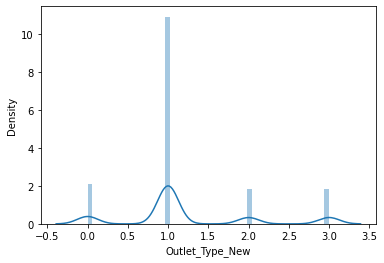

In [54]:
sns.distplot(df['Outlet_Type_New'])

- skewness is present, it is because one category has more data counts while others have very less

In [55]:
#using log transformation on 'Outlet_Type_New' only

x['Outlet_Type_New']=np.log(x['Outlet_Type_New']+1)

In [56]:
x.skew()

Item_Weight        0.089962
Item_MRP           0.137074
Item_Type_New      0.113822
Outlet_Years       0.410554
Item_Fat           0.209369
Outlet            -0.057465
Outlet_Location   -0.198522
Outlet_Type_New   -0.249471
dtype: float64

-skewness has been reduced

In [54]:
#scaling the input data

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [58]:
x=pd.DataFrame(x)

In [59]:
#checking for multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['features']=x.columns
    print(vif)

In [60]:
vif_calc()

   VIF Factor  features
0    1.004959         0
1    1.002433         1
2    1.041722         2
3    1.013208         3
4    1.036240         4
5    4.289228         5
6    4.869811         6
7    2.430641         7


- no feature has above 5 VIF so the data isn't much multicollinear

since the target variable is of continuous type we will first try linear regression and then other alogorithms as well:

In [55]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [62]:
lr=LinearRegression()

In [63]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.30)
    lr.fit(x_train,y_train)
    predtrain=lr.predict(x_train)
    predlr=lr.predict(x_test)
    if round(r2_score(y_test,predlr)*100)==round(r2_score(y_train,predtrain)*100):
        print('At random state',i,'the model performs very well')
        print('At random state',i,':')
        print('Training accuracy score is',r2_score(y_train,predtrain)*100)
        print('Testing accuracy score is',r2_score(y_test,predlr)*100,'\n')

At random state 7 the model performs very well
At random state 7 :
Training accuracy score is 51.680369848735076
Testing accuracy score is 52.48325787181318 

At random state 9 the model performs very well
At random state 9 :
Training accuracy score is 52.09637100266444
Testing accuracy score is 51.567640505861625 

At random state 10 the model performs very well
At random state 10 :
Training accuracy score is 51.90947611187112
Testing accuracy score is 52.06136905112926 

At random state 12 the model performs very well
At random state 12 :
Training accuracy score is 52.13828053920313
Testing accuracy score is 51.53172547641853 

At random state 18 the model performs very well
At random state 18 :
Training accuracy score is 51.939015488171634
Testing accuracy score is 51.98547352345003 

At random state 20 the model performs very well
At random state 20 :
Training accuracy score is 52.144410279542
Testing accuracy score is 51.51752834853177 

At random state 23 the model performs very 

- linear regression is giving us less accuracy scores

In [64]:
mselr=mean_squared_error(y_test,predlr)
maelr=mean_absolute_error(y_test,predlr)

In [65]:
print('Mean squared error:',mselr)
print('Mean absolute error:',maelr)

Mean squared error: 1249333.490500449
Mean absolute error: 849.6660988338361


In [66]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [67]:
#now checking for best random state for KNeighbors with best accuracy

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.30)
    knn=KNeighborsRegressor()
    knn.fit(x_train,y_train)
    predtrain=knn.predict(x_train)
    predknn=knn.predict(x_test)
    if r2_score(y_test,predknn)*100>55:
        print('At random state',i,'the model performs very well')
        print('At random state',i,':')
        print('Training accuracy score is',r2_score(y_train,predtrain)*100)
        print('Testing accuracy score is',r2_score(y_test,predknn)*100,'\n')

At random state 8 the model performs very well
At random state 8 :
Training accuracy score is 66.40544105997581
Testing accuracy score is 55.51913066814864 



In [68]:
mseknn=mean_squared_error(y_test,predknn)
maeknn=mean_absolute_error(y_test,predknn)

In [69]:
print('Mean squared error:',mseknn)
print('Mean absolute error:',maeknn)

Mean squared error: 1242443.910076594
Mean absolute error: 800.3226531225297


# Regularization:

In [70]:
from sklearn.linear_model import Lasso,Ridge

In [71]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.30)
    ls=Lasso()
    ls.fit(x_train,y_train)
    predtrain=ls.predict(x_train)
    predls=ls.predict(x_test)
    if round(r2_score(y_test,predls)*100)==round(r2_score(y_train,predtrain)*100):
        print('At random state',i,'the model performs very well')
        print('At random state',i,':')
        print('Training accuracy score is',r2_score(y_train,predtrain)*100)
        print('Testing accuracy score is',r2_score(y_test,predls)*100,'\n')

At random state 7 the model performs very well
At random state 7 :
Training accuracy score is 51.67993466688142
Testing accuracy score is 52.48409509166314 

At random state 9 the model performs very well
At random state 9 :
Training accuracy score is 52.095965574991965
Testing accuracy score is 51.56319478679501 

At random state 10 the model performs very well
At random state 10 :
Training accuracy score is 51.909048065965436
Testing accuracy score is 52.05547696385231 

At random state 12 the model performs very well
At random state 12 :
Training accuracy score is 52.137852991367836
Testing accuracy score is 51.538791747291945 

At random state 18 the model performs very well
At random state 18 :
Training accuracy score is 51.93858013732422
Testing accuracy score is 51.98928965745164 

At random state 20 the model performs very well
At random state 20 :
Training accuracy score is 52.144012377916525
Testing accuracy score is 51.523439804407076 

At random state 23 the model performs 

In [72]:
msels=mean_squared_error(y_test,predls)
maels=mean_absolute_error(y_test,predls)

print('Mean squared error:',msels)
print('Mean absolute error:',maels)

Mean squared error: 1249612.8121241222
Mean absolute error: 849.7663533872682


In [73]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.30)
    ridge=Ridge()
    ridge.fit(x_train,y_train)
    predtrain=ridge.predict(x_train)
    predri=ridge.predict(x_test)
    if round(r2_score(y_test,predri)*100)==round(r2_score(y_train,predtrain)*100):
        print('At random state',i,'the model performs very well')
        print('At random state',i,':')
        print('Training accuracy score is',r2_score(y_train,predtrain)*100)
        print('Testing accuracy score is',r2_score(y_test,predri)*100,'\n')

At random state 7 the model performs very well
At random state 7 :
Training accuracy score is 51.680366845575065
Testing accuracy score is 52.48228669121334 

At random state 9 the model performs very well
At random state 9 :
Training accuracy score is 52.09636774490443
Testing accuracy score is 51.567382413465246 

At random state 10 the model performs very well
At random state 10 :
Training accuracy score is 51.909473169345674
Testing accuracy score is 52.060944803180696 

At random state 12 the model performs very well
At random state 12 :
Training accuracy score is 52.138276881191125
Testing accuracy score is 51.532582622025494 

At random state 18 the model performs very well
At random state 18 :
Training accuracy score is 51.93901228964013
Testing accuracy score is 51.98547841523749 

At random state 20 the model performs very well
At random state 20 :
Training accuracy score is 52.144406990461704
Testing accuracy score is 51.517797566166145 

At random state 23 the model perform

In [74]:
mseri=mean_squared_error(y_test,predri)
maeri=mean_absolute_error(y_test,predri)

print('Mean squared error:',mseri)
print('Mean absolute error:',maeri)

Mean squared error: 1249361.2881542314
Mean absolute error: 849.673453432236


In [75]:
from sklearn.tree import DecisionTreeRegressor

In [76]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.30)
    dtc=DecisionTreeRegressor()
    dtc.fit(x_train,y_train)
    predtrain=dtc.predict(x_train)
    preddtc=dtc.predict(x_test)
    
    print('At random state',i,'the model performs very well')
    print('At random state',i,':')
    print('Training accuracy score is',r2_score(y_train,predtrain)*100)
    print('Testing accuracy score is',r2_score(y_test,preddtc)*100,'\n')

At random state 0 the model performs very well
At random state 0 :
Training accuracy score is 99.95643149712082
Testing accuracy score is 19.887142568176554 

At random state 1 the model performs very well
At random state 1 :
Training accuracy score is 99.98866209700378
Testing accuracy score is 15.910603108866495 

At random state 2 the model performs very well
At random state 2 :
Training accuracy score is 99.97569039437364
Testing accuracy score is 12.80841267337307 

At random state 3 the model performs very well
At random state 3 :
Training accuracy score is 99.97646946880678
Testing accuracy score is 18.29648386384569 

At random state 4 the model performs very well
At random state 4 :
Training accuracy score is 99.96339739003106
Testing accuracy score is 13.487958857794757 

At random state 5 the model performs very well
At random state 5 :
Training accuracy score is 99.96444051589684
Testing accuracy score is 11.385680684414613 

At random state 6 the model performs very well
A

At random state 52 the model performs very well
At random state 52 :
Training accuracy score is 99.97034272240995
Testing accuracy score is 14.398025419358351 

At random state 53 the model performs very well
At random state 53 :
Training accuracy score is 99.98727424086393
Testing accuracy score is 15.174818212483432 

At random state 54 the model performs very well
At random state 54 :
Training accuracy score is 99.97365090601343
Testing accuracy score is 21.46679821654426 

At random state 55 the model performs very well
At random state 55 :
Training accuracy score is 99.94756209651878
Testing accuracy score is 15.379528146223098 

At random state 56 the model performs very well
At random state 56 :
Training accuracy score is 99.96637061605071
Testing accuracy score is 19.723183209024164 

At random state 57 the model performs very well
At random state 57 :
Training accuracy score is 99.98204818158587
Testing accuracy score is 13.03361789785782 

At random state 58 the model perform

In [77]:
msedtc=mean_squared_error(y_test,preddtc)
maedtc=mean_absolute_error(y_test,preddtc)

print('Mean squared error:',msedtc)
print('Mean absolute error:',maedtc)

Mean squared error: 2152967.9600043017
Mean absolute error: 1046.9798422529645


# Ensemble and Hyperparameter tuning:

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor

In [103]:
parameters={'criterion':["squared_error", "absolute_error", "poisson"],'max_features':['sqrt','log2','auto']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=8,test_size=.30)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'absolute_error', 'max_features': 'log2'}


In [79]:
rf=RandomForestRegressor(criterion='absolute_error',max_features='log2')
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=8,test_size=.30)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)

rfscore=r2_score(y_test,predrf)

print('Accuracy score for Random Forest is:',rfscore*100)

Accuracy score for Random Forest is: 56.432463163481586


- random forest is giving slightly better accuracy than KNeighbors

In [80]:
mserf=mean_squared_error(y_test,predrf)
maerf=mean_absolute_error(y_test,predrf)

print('Mean squared error:',mserf)
print('Mean absolute error:',maerf)

Mean squared error: 1094493.3880928187
Mean absolute error: 751.6117277383398


In [81]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.30)
    ada=AdaBoostRegressor()
    ada.fit(x_train,y_train)
    predtrain=ada.predict(x_train)
    predtada=lr.predict(x_test)
    if r2_score(y_test,predtada)*100>53:
        print('At random state',i,'the model performs very well')
        print('At random state',i,':')
        print('Training accuracy score is',r2_score(y_train,predtrain)*100)
        print('Testing accuracy score is',r2_score(y_test,predtada)*100,'\n')

At random state 8 the model performs very well
At random state 8 :
Training accuracy score is 56.62390722923679
Testing accuracy score is 53.93136988177372 

At random state 14 the model performs very well
At random state 14 :
Training accuracy score is 57.085783984717196
Testing accuracy score is 53.025004121239746 

At random state 40 the model performs very well
At random state 40 :
Training accuracy score is 54.99100402231496
Testing accuracy score is 53.57132933799236 

At random state 49 the model performs very well
At random state 49 :
Training accuracy score is 56.25167881670159
Testing accuracy score is 53.79127021202024 

At random state 71 the model performs very well
At random state 71 :
Training accuracy score is 56.50869619051927
Testing accuracy score is 53.514237052142754 

At random state 75 the model performs very well
At random state 75 :
Training accuracy score is 56.19051166007816
Testing accuracy score is 53.72495196900746 

At random state 78 the model performs v

In [82]:
mseada=mean_squared_error(y_test,predtada)
maeada=mean_absolute_error(y_test,predtada)

print('Mean squared error:',mseada)
print('Mean absolute error:',maeada)

Mean squared error: 1249333.490500449
Mean absolute error: 849.6660988338361


In [83]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.30)
    gbr=GradientBoostingRegressor()
    gbr.fit(x_train,y_train)
    predtrain=gbr.predict(x_train)
    predtgbr=gbr.predict(x_test)
    if r2_score(y_test,predtgbr)*100>60:
        print('At random state',i,'the model performs very well')
        print('At random state',i,':')
        print('Training accuracy score is',r2_score(y_train,predtrain)*100)
        print('Testing accuracy score is',r2_score(y_test,predtgbr)*100,'\n')

At random state 0 the model performs very well
At random state 0 :
Training accuracy score is 62.19505337421051
Testing accuracy score is 60.42892727083194 

At random state 7 the model performs very well
At random state 7 :
Training accuracy score is 62.28541476857499
Testing accuracy score is 60.27377417643759 

At random state 8 the model performs very well
At random state 8 :
Training accuracy score is 61.91568951683883
Testing accuracy score is 60.90124143959446 

At random state 16 the model performs very well
At random state 16 :
Training accuracy score is 62.006438641553395
Testing accuracy score is 60.031544986128935 

At random state 25 the model performs very well
At random state 25 :
Training accuracy score is 62.34275911751781
Testing accuracy score is 60.390237953959456 

At random state 26 the model performs very well
At random state 26 :
Training accuracy score is 62.323078289547595
Testing accuracy score is 60.24556831827933 

At random state 32 the model performs very

- so far, GradientBoostingRegressor is giving us the best results.

In [84]:
msegbr=mean_squared_error(y_test,predtgbr)
maegbr=mean_absolute_error(y_test,predtgbr)

print('Mean squared error:',msegbr)
print('Mean absolute error:',maegbr)

Mean squared error: 1057120.2054682437
Mean absolute error: 741.7823314054085


In [87]:
#so as we can see GradientBoosting is giving us the best result so far so we will use hyperparameter tuning

parameters={'criterion':["squared_error", "friedman_mse", "mse","mae"],'max_features':['sqrt','log2','auto']}
gbr=GradientBoostingRegressor()
clf=GridSearchCV(gbr,parameters)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=86,test_size=.30)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'friedman_mse', 'max_features': 'sqrt'}


In [93]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.30)
    gbr=GradientBoostingRegressor(criterion='friedman_mse',max_features='sqrt')
    gbr.fit(x_train,y_train)
    predtrain=gbr.predict(x_train)
    predgbr=gbr.predict(x_test)
    
    print('At random state',i,'the model performs very well')
    print('At random state',i,':')
    print('Training accuracy score is',r2_score(y_train,predtrain)*100)
    print('Testing accuracy score is',r2_score(y_test,predgbr)*100,'\n')

At random state 0 the model performs very well
At random state 0 :
Training accuracy score is 61.204689169980895
Testing accuracy score is 60.37914215527211 

At random state 1 the model performs very well
At random state 1 :
Training accuracy score is 61.64637490795114
Testing accuracy score is 59.13852881687496 

At random state 2 the model performs very well
At random state 2 :
Training accuracy score is 61.929507973228716
Testing accuracy score is 58.53495115385496 

At random state 3 the model performs very well
At random state 3 :
Training accuracy score is 61.701337843451796
Testing accuracy score is 59.13328624811184 

At random state 4 the model performs very well
At random state 4 :
Training accuracy score is 61.639206262908395
Testing accuracy score is 59.34465200512281 

At random state 5 the model performs very well
At random state 5 :
Training accuracy score is 62.82527848734342
Testing accuracy score is 56.257604893176925 

At random state 6 the model performs very well


At random state 52 the model performs very well
At random state 52 :
Training accuracy score is 61.24264785729084
Testing accuracy score is 59.77393285213268 

At random state 53 the model performs very well
At random state 53 :
Training accuracy score is 62.22166486361154
Testing accuracy score is 58.12049095358237 

At random state 54 the model performs very well
At random state 54 :
Training accuracy score is 61.591920535839925
Testing accuracy score is 59.04707881035478 

At random state 55 the model performs very well
At random state 55 :
Training accuracy score is 61.58284462189497
Testing accuracy score is 59.539615804787225 

At random state 56 the model performs very well
At random state 56 :
Training accuracy score is 61.564939601212146
Testing accuracy score is 59.24714790911159 

At random state 57 the model performs very well
At random state 57 :
Training accuracy score is 62.248845885790516
Testing accuracy score is 57.61620791777874 

At random state 58 the model perform

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=18,test_size=.30)
gbr=GradientBoostingRegressor(criterion='friedman_mse',max_features='sqrt')
gbr.fit(x_train,y_train)
predtrain=gbr.predict(x_train)
predgbr=gbr.predict(x_test)

In [79]:
print(r2_score(y_test,predgbr)*100)

59.20267976502033


In [108]:
msegbrt=mean_squared_error(y_test,predgbr)
maegbrt=mean_absolute_error(y_test,predgbr)

print('Mean squared error:',msegbrt)
print('Mean absolute error:',maegbrt)

Mean squared error: 1056209.4735486957
Mean absolute error: 744.6636606061024


In [62]:
for j in range(2,20):
    gbr=GradientBoostingRegressor(criterion='friedman_mse',max_features='sqrt')
    cvs=cross_val_score(gbr,x,y,cv=j)
    cvc=cvs.mean()
    print('At cv:',j)
    print('Cross Validation Score:',cvc*100,'\n')

At cv: 2
Cross Validation Score: 58.99010306324476 

At cv: 3
Cross Validation Score: 59.00321846809201 

At cv: 4
Cross Validation Score: 58.93024750819187 

At cv: 5
Cross Validation Score: 58.94953913402975 

At cv: 6
Cross Validation Score: 59.27369384938196 

At cv: 7
Cross Validation Score: 59.17894960086002 

At cv: 8
Cross Validation Score: 59.125292532092054 

At cv: 9
Cross Validation Score: 59.11668479291463 

At cv: 10
Cross Validation Score: 59.06596746108386 

At cv: 11
Cross Validation Score: 59.09763335592184 

At cv: 12
Cross Validation Score: 59.11771154825701 

At cv: 13
Cross Validation Score: 59.07084857527989 

At cv: 14
Cross Validation Score: 59.08984759960406 

At cv: 15
Cross Validation Score: 59.1226546115454 

At cv: 16
Cross Validation Score: 59.15202687998291 

At cv: 17
Cross Validation Score: 59.11094871868205 

At cv: 18
Cross Validation Score: 59.018113652197925 

At cv: 19
Cross Validation Score: 59.14601455555065 



In [112]:
errordf=pd.DataFrame({'Mean Squared Error':[mselr,msels,mseri,mseknn,msedtc,mserf,mseada,msegbr,msegbrt],'Mean Absolute Error':[maelr,maels,maeri,maeknn,maedtc,maerf,maeada,maegbr,maegbrt]},index=['LinearRegression','Lasso','Ridge','KNeighbors','DecisionTree','RandomForest','AdaBoost','GradientBoosting','GradientBoosting Tuned'])
errordf

,Mean Squared Error,Mean Absolute Error
LinearRegression,1.249333e+06,849.666099
Lasso,1.249613e+06,849.766353
Ridge,1.249361e+06,849.673453
KNeighbors,1.242444e+06,800.322653
DecisionTree,2.152968e+06,1046.979842
RandomForest,1.094493e+06,751.611728
AdaBoost,1.249333e+06,849.666099
GradientBoosting,1.057120e+06,741.782331
GradientBoosting Tuned,1.056209e+06,744.663661


In [77]:
gbr=GradientBoostingRegressor(criterion='friedman_mse',max_features='sqrt')
cvs=cross_val_score(gbr,x,y,cv=6)
cvc=cvs.mean()
cvc*100

59.24145509052207

In [80]:
#so we are going to save the best model that is GradientBoostingRegressor

print('Model is performing fine with:',gbr)
print('Accuracy Score is:',round(r2_score(y_test,predgbr)*100,1))
print('Cross-Validation Score is:',round(cvc*100,1))

Model is performing fine with: GradientBoostingRegressor(max_features='sqrt')
Accuracy Score is: 59.2
Cross-Validation Score is: 59.2


In [81]:
preddf=pd.DataFrame({'Original Item Sales':y_test,'Predicted Item Sales':predgbr})
preddf

,Original Item Sales,Predicted Item Sales
8090,161.7894,-30.516516
6725,3691.1952,4438.818706
2651,3643.2576,3727.815959
428,796.9626,1502.621849
3078,2233.0932,2769.876603
...,...,...
8495,4314.3840,2744.643386
6170,679.1160,674.108633
3230,1416.8224,1709.641214
8165,4327.7000,4779.693880


In [82]:
#saving the model

import pickle

pickle.dump(gbr,open('bigdatamart.pkl','wb'))

In [1]:
#now loading the data for testing


import pandas as pd
import numpy as np

dftest=pd.read_csv('bigdatamart_test.csv')
dftest

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


operations:
    
- firstly we are going to check for null values and if present we will use imputation method.
- then we are going to create new categories and combine some.
- afterwards we are going to do encoding for categorical datatypes.
- then we are going to predict the values based on our saved model by calling it.

In [3]:
#checking for null values:

dftest.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [7]:
#using Simple Imputer to fill missing values

from sklearn.impute import SimpleImputer

imp=SimpleImputer()
dftest['Item_Weight']=imp.fit_transform(dftest['Item_Weight'].values.reshape(-1,1))
imp=SimpleImputer(strategy='most_frequent')
dftest['Outlet_Size']=imp.fit_transform(dftest['Outlet_Size'].values.reshape(-1,1))

In [8]:
dftest.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [9]:
#now creating new item type and improving some columns

dftest['Item_Type_New']=dftest['Item_Identifier'].apply(lambda x:x[:2])
dftest['Item_Type_New']

0       FD
1       FD
2       NC
3       FD
4       FD
        ..
5676    FD
5677    FD
5678    NC
5679    FD
5680    FD
Name: Item_Type_New, Length: 5681, dtype: object

In [10]:
dftest['Item_Type_New']=dftest['Item_Type_New'].replace({'FD':'Food','DR':'Drink','NC':'Non-Consumable'})
dftest['Item_Type_New']

0                 Food
1                 Food
2       Non-Consumable
3                 Food
4                 Food
             ...      
5676              Food
5677              Food
5678    Non-Consumable
5679              Food
5680              Food
Name: Item_Type_New, Length: 5681, dtype: object

In [11]:
dftest['Item_Visibility'].replace(0,dftest['Item_Visibility'].mean(),inplace=True)

In [13]:
dftest['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'},inplace=True)
dftest['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [14]:
dftest.loc[dftest['Item_Type_New']=='Non-Consumable','Item_Fat_Content']='Non-Edible'
dftest['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'Non-Edible'], dtype=object)

In [15]:
dftest['Outlet_Establishment_Year']=2013-dftest['Outlet_Establishment_Year']

In [18]:
dftest.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Type_New                 object
dtype: object

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

enco=['Item_Fat_Content','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Type_New']

for i in enco:
    dftest[i]=le.fit_transform(dftest[i])

In [26]:
dftest.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Type_New'],
      dtype='object')

- dropping the not required columns

In [83]:
x=dftest.drop(['Item_Identifier','Item_Visibility','Outlet_Size','Item_Type'],axis=1)
x.shape

(5681, 8)

In [86]:
#now predicting values using our saved model

import pickle
import warnings
warnings.filterwarnings('ignore')

model=pickle.load(open('bigdatamart.pkl','rb'))

predtestdf=model.predict(x)

In [88]:
pd.DataFrame(predtestdf)

,0
0,2420.298405
1,5519.031180
2,4688.818074
3,3018.549762
4,5619.495870
...,...
5676,5030.091312
5677,5619.495870
5678,4953.263394
5679,5519.031180
